# Boundary conditions and load cases examples

Thanks the Bardell equations implamentation, composipy is capable of simulating different boundary conditions and different combinations of load cases.



## Importing composipy objects and creating properties

In [88]:
from composipy import OrthotropicMaterial, LaminateProperty
from composipy import PlateStructure
import matplotlib

In [54]:
#Ply Material Properties (MPa and mm)
E1 = 60800
E2 = 58250
v12 = 0.07
G12 = 4550
t = 0.21

# Plate Parameters (mm)
a = 360.
b = 360.
m = 10 # discretization in x direction
n = 10 # discretization in y direction


# Stacking sequence
stacking = [45,-45,0,90,45,-45,0,90,45,-45]
stacking += stacking[::-1] # symmetry

In [55]:
# Ply material and laminate property objects

ply_1 = OrthotropicMaterial(E1, E2, v12, G12, t)
l1 = LaminateProperty(stacking, ply_1)

## Pinned Nxx

In [56]:
panel_SSSS = PlateStructure(l1, a, b, m=m, n=n, Nxx=-1,constraints='PINNED')

In [57]:
eigvals, eigvecs = panel_SSSS.buckling_analysis()

In [58]:
eigvals

array([ 97.04915682, 144.47730786, 246.83882036, 388.19669784,
       393.21258067])

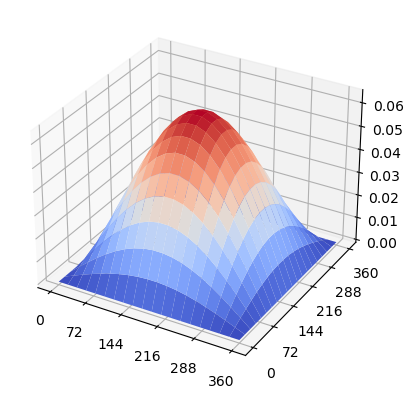

In [59]:
panel_SSSS.plot_eigenvalue()

## Clamped Nxy and Nyy

In [92]:
panel_CCCC = PlateStructure(l1, a, 1.5*b, m=m, n=n, Nxy=-1, Nyy=-1, constraints='CLAMPED')

In [93]:
panel_CCCC.buckling_analysis()

(array([138.79310181, 146.27293322, 214.40196835, 235.95368935,
        345.90300267]),
 array([[ 9.34248014e-16, -1.88156661e-14,  2.02134850e-14,
          2.34440133e-15,  1.61245714e-14],
        [-2.12462063e-14,  9.37191184e-14, -1.09651915e-13,
          1.22922751e-15, -8.64977457e-14],
        [-1.68030603e-14, -2.94928446e-15,  3.17565273e-15,
          6.43801745e-15,  2.49531496e-15],
        ...,
        [ 1.48429879e-13, -6.09319462e-02,  5.26382491e-01,
          6.94793823e-13,  8.03873977e-01],
        [ 1.74056918e-01,  1.50428248e-13,  1.23757124e-13,
         -1.99938292e-01,  1.44448141e-13],
        [ 1.19772248e-13, -4.03658981e-02,  4.21566452e-01,
          9.40855121e-13,  5.20345902e-01]]))

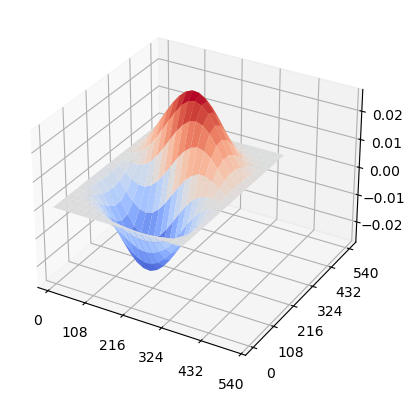

In [94]:
panel_CCCC.plot_eigenvalue()
%matplotlib inline

## Free edge Nxx (custom boundary condition)

In [95]:
constraints={
                'x0': ['TX', 'TY', 'TZ'],
                'xa': ['TX', 'TY', 'TZ'],
                'y0': [],
                'yb': ['TX', 'TY', 'TZ'],
            }
panel_SSFS = PlateStructure(l1, 1.5*a, b, m=m, n=n, Nxx=-1, constraints=constraints)

In [96]:
panel_SSFS.buckling_analysis()

(array([ 20.12080055,  47.13886913,  92.5739614 , 156.53663617,
        185.19779529]),
 array([[-5.54254543e-15,  8.54682964e-15,  2.02336476e-15,
          2.14117401e-14,  2.25590066e-14],
        [ 2.70857705e-13, -3.87614772e-13,  1.33465332e-13,
         -2.01037659e-12, -4.41333984e-13],
        [-2.62755574e-14,  1.09823238e-13, -6.76289507e-15,
          1.36766074e-13,  1.13523615e-14],
        ...,
        [ 6.90309193e-03,  6.95127053e-05, -5.12419786e-03,
          3.38168226e-02, -1.43816796e-05],
        [ 9.66068997e-04, -2.79805029e-05,  4.46813288e-04,
         -2.74685452e-02, -3.51157619e-05],
        [ 3.64137204e-03,  3.67529764e-05, -2.79731072e-03,
          3.43269351e-02, -6.21653806e-06]]))

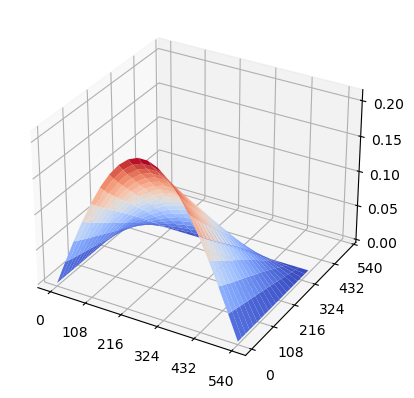

In [97]:
panel_SSFS.plot_eigenvalue()

## Nxy Loading

In [66]:
panel_CCCC_nxy = PlateStructure(l1, a, b, m=m, n=n, Nxy=-1, constraints='CLAMPED')

In [67]:
panel_CCCC_nxy.buckling_analysis()

(array([338.84283307, 389.26571459, 776.82143839, 824.28455938,
        882.94931083]),
 array([[-9.85787017e-14,  5.49320863e-14, -5.53627846e-14,
         -5.47863549e-14, -1.63309599e-13],
        [-1.14383443e-13,  4.82531544e-14, -2.16269855e-14,
         -8.98291546e-14, -2.25169408e-13],
        [-8.24080163e-15,  5.29270154e-14, -4.71651923e-15,
         -9.11230373e-14, -1.89295317e-14],
        ...,
        [ 5.84301288e-01,  7.76122020e-13,  3.22800174e-01,
          3.29448845e-12,  2.20803287e-12],
        [-7.64092132e-13, -1.01135119e-01,  6.65989832e-12,
         -1.79699680e-01, -3.68197373e-01],
        [ 3.89453084e-01,  5.26513867e-13,  2.20302574e-01,
          1.92960329e-12, -5.54281896e-14]]))

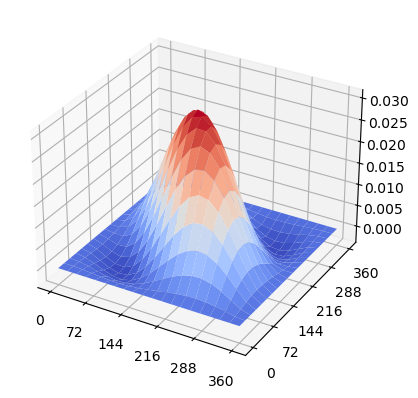

In [68]:
panel_CCCC_nxy.plot_eigenvalue()